Extracting data for question 1

In [3]:
import os
import pandas as pd

# Since the notebook is inside Project 2, we just go from current folder
folder = "computed data/pore analysis"

# List of target properties to extract
properties = [
    "Density",
    "ASA_m^2/g",
    "POAV_A^3",
    "POAV_Volume_fraction"
]

data = []

# Loop through all CSV files
for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        path = os.path.join(folder, filename)
        df = pd.read_csv(path)
        
        # Convert to dictionary for easy lookup
        kv = pd.Series(df.Value.values, index=df.Key).to_dict()
        
        # Extract desired properties
        entry = {"Material": filename.replace(".csv", "")}
        for prop in properties:
            entry[prop] = float(kv.get(prop, "nan"))
        
        data.append(entry)

# Create a summary dataframe
summary_df = pd.DataFrame(data)

# Display or save
print(summary_df)
summary_df.to_csv("pore_analysis_summary.csv", index=False)


  Material   Density  ASA_m^2/g  POAV_A^3  POAV_Volume_fraction
0  NOTT300  1.039260    1648.23  1297.110               0.48999
1   UTSA20  0.882399    2607.10  3575.360               0.62907
2     ZIF8  0.909567    1736.33  2488.250               0.49906
3   UTSA80  0.678215    3188.86  9619.780               0.66798
4  MgMOF74  0.886275    1842.96   837.198               0.61368


making a nice graph

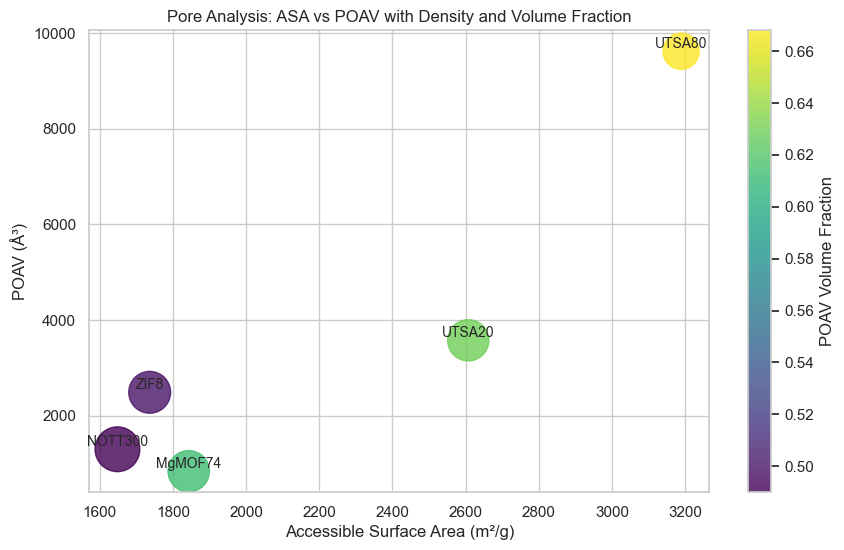

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (from your summary)
data = {
    "Material": ["MgMOF74","NOTT300","UTSA20","UTSA80","ZIF8"],
    "Density": [0.88628, 1.03926, 0.88240, 0.67822, 0.90957],
    "ASA_m2/g": [1842.96, 1648.23, 2607.10, 3188.86, 1736.33],
    "POAV_A3": [837.20, 1297.11, 3575.36, 9619.78, 2488.25],
    "POAV_Volume_fraction": [0.61368, 0.48999, 0.62907, 0.66798, 0.49906]
}
df = pd.DataFrame(data)

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

scatter = plt.scatter(
    df["ASA_m2/g"], df["POAV_A3"], 
    s=df["Density"]*1000,  # bubble size proportional to density
    c=df["POAV_Volume_fraction"], cmap="viridis", alpha=0.8
)

for i, txt in enumerate(df["Material"]):
    plt.annotate(txt, (df["ASA_m2/g"][i], df["POAV_A3"][i]), fontsize=10, ha="center", va="bottom")

plt.colorbar(scatter, label="POAV Volume Fraction")
plt.xlabel("Accessible Surface Area (m²/g)")
plt.ylabel("POAV (Å³)")
plt.title("Pore Analysis: ASA vs POAV with Density and Volume Fraction")
plt.show()


same for q2

In [12]:
import os
import pandas as pd
import numpy as np

folder = "computed data/HenryK_Isotherms"
mofs = ["MgMOF", "NOTT300", "UTSA20", "UTSA80", "ZIF8"]

henry_data = {"Material": [], "CO2": [], "N2": []}

for mof in mofs:
    henry_data["Material"].append(mof)
    
    for gas in ["CO2", "N2"]:
        file_path = os.path.join(folder, f"{mof}_{gas}.csv")
        df = pd.read_csv(file_path)
        
        row = df[df["Key"].str.strip() == "henry_coefficient_average"]
        if not row.empty:
            # Keep as string to preserve exact formatting
            kH = row["Value"].iloc[0]
        else:
            kH = np.nan
            
        henry_data[gas].append(kH)

# Create DataFrame
henry_df = pd.DataFrame(henry_data)

# Sort by CO2 descending
henry_df = henry_df.sort_values(by="CO2", ascending=False).reset_index(drop=True)

# Display exact values as strings (no rounding)
pd.set_option('display.float_format', lambda x: '%.20f' % x if pd.notnull(x) else 'NaN')
print(henry_df)


  Material          CO2           N2
0    MgMOF  8.89038e-05   3.3373e-06
1     ZIF8  8.80771e-06          NaN
2   UTSA20  4.10731e-05  4.38848e-06
3   UTSA80  1.69012e-05  3.33558e-06
4  NOTT300  0.000184318  1.05463e-05


/var/folders/x8/ypxvp3g937zfhl5gj7l0_7vm0000gn/T/ipykernel_46633/2756119737.py:45: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/ppchem/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


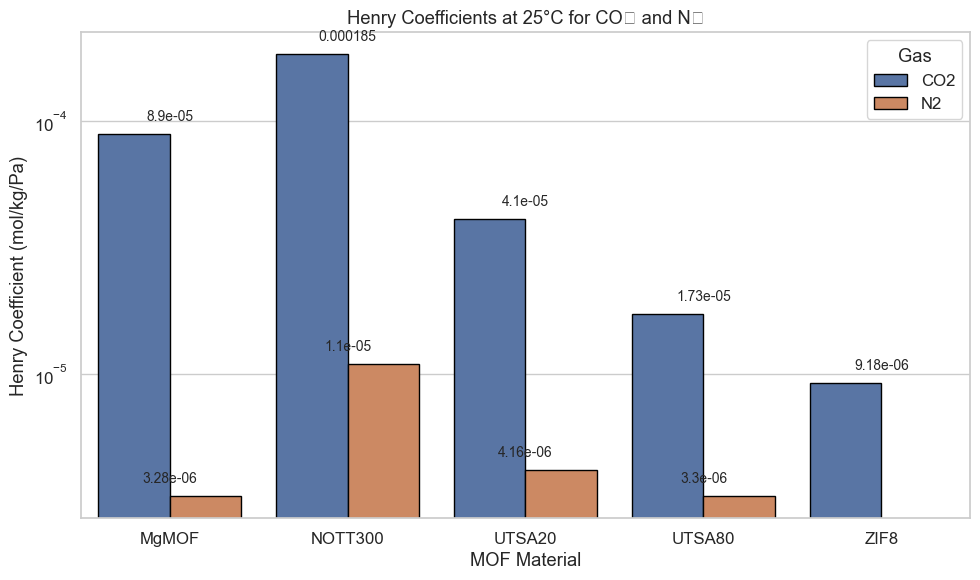

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
data = {
    "Material": ["MgMOF","NOTT300","UTSA20","UTSA80","ZIF8"],
    "CO2": [0.0000890038, 0.0001845038, 0.0000410422, 0.0000173281, 0.0000091843],
    "N2": [0.0000032819, 0.0000109710, 0.0000041623, 0.0000032981, np.nan]
}

df = pd.DataFrame(data)

# Melt for Seaborn
df_melt = df.melt(id_vars="Material", value_vars=["CO2","N2"], var_name="Gas", value_name="Henry Coefficient")

# Plot
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10,6))
palette = {"CO2":"#4c72b0", "N2":"#dd8452"}  # nice contrasting colors
bar_plot = sns.barplot(
    x="Material", y="Henry Coefficient", hue="Gas", 
    data=df_melt, palette=palette, edgecolor="black", dodge=True
)

# Add rounded labels on top (3 significant figures)
for i, row in df_melt.iterrows():
    if not np.isnan(row["Henry Coefficient"]):
        bar_plot.text(
            x=i % 5,  # position
            y=row["Henry Coefficient"]*1.1,  # slightly above bar
            s=f"{row['Henry Coefficient']:.3g}",  # 3 significant figures
            ha="center",
            va="bottom",
            fontsize=10
        )

# Log scale for clarity
plt.yscale("log")
plt.ylabel("Henry Coefficient (mol/kg/Pa)")
plt.xlabel("MOF Material")
plt.title("Henry Coefficients at 25°C for CO₂ and N₂")
plt.legend(title="Gas")
plt.tight_layout()
plt.show()
